# **Business Case: Aerofit - Descriptive Statistics & Probability**

**About Aerofit**

Aerofit is a leading brand in the field of fitness equipment. Aerofit provides a product range including machines such as treadmills, exercise bikes, gym equipment, and fitness accessories to cater to the needs of all categories of people.

**Business Problem**

The market research team at AeroFit wants to identify the characteristics of the target audience for each type of treadmill offered by the company, to provide a better recommendation of the treadmills to the new customers. The team decides to investigate whether there are differences across the product with respect to customer characteristics.


*   Perform descriptive analytics to create a customer profile for each AeroFit treadmill product by developing appropriate tables and charts.
*   For each AeroFit treadmill product, construct two-way contingency tables and compute all conditional and marginal probabilities along with their insights/impact on the business.






---

## Importing libraries and downloading dataset

In [1]:
#Importing Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#Downloading Aerofit Dataset
df = pd.read_csv('https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/125/original/aerofit_treadmill.csv?1639992749')

## Basic Metrics of Aerofit dataset

In [ ]:
#first 5 rows
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [ ]:
#last 5 rows
df.tail()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
175,KP781,40,Male,21,Single,6,5,83416,200
176,KP781,42,Male,18,Single,5,4,89641,200
177,KP781,45,Male,16,Single,5,5,90886,160
178,KP781,47,Male,18,Partnered,4,5,104581,120
179,KP781,48,Male,18,Partnered,4,5,95508,180


In [ ]:
#shape
df.shape

(180, 9)

In [ ]:
#size
df.size

1620

In [ ]:
#columns
df.columns

Index(['Product', 'Age', 'Gender', 'Education', 'MaritalStatus', 'Usage',
       'Fitness', 'Income', 'Miles'],
      dtype='object')

In [ ]:
#indices
df.index

RangeIndex(start=0, stop=180, step=1)

In [ ]:
#information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [ ]:
#unique counts in each column
df.nunique()

Product           3
Age              32
Gender            2
Education         8
MaritalStatus     2
Usage             6
Fitness           5
Income           62
Miles            37
dtype: int64

In [ ]:
#check nulls
df.isna().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

In [ ]:
#duplicates
df.duplicated().sum()

0

We can see that there are no duplicates and null values in the dataset

## Descriptive Statistical Analysis

In [ ]:
#statistical analysis for numerical columns
df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


**1. Age:** Customer's age ranges from `18 to 50 years`, with an average age of `29 years`.

**2. Education:** Customer's education duration vary between `12 and 21 years`, with an average education of `16 years`.

**3. Usage:** Customer's usage of the product ranges from `2 to 7 times per week`, with an average usage frequency of `3 times per week`.

**4. Fitness:** Customers have rated their fitness on the scale of `1 to 5`, with an average being `3` reflecting a `moderate level of fitness`.

**5. Income:** Customer's annual income falls within the range of `$ 30,000 to $ 100,000`, with an average income of approximately `$ 54,000`.

**6. Miles:** Customer's running goals range from `21 to 360 miles per week`, with an average of `103 miles per week`.

In [ ]:
#statistical analysis for object type columns
jndf.describe(include = 'object')

,Product,Gender,MaritalStatus
count,180,180,180
unique,3,2,2
top,KP281,Male,Partnered
freq,80,104,107


**7. Product:** Based on the data, product `KP281` is sold more compared to the other two products having `80` sales.

**8. Gender:** Based on the data, most of the buyers are `Male` having count of `140`.

**9. Marital Status:**  Based on the data, most of the buyers were `Married` having count of `107`.

## Adding Grouped Columns

In [ ]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


We can group the following columns for further analysis:
  
* **Age**

  Categorizing the values in age column in 4 different buckets:

  1. Young Adult: 15 - 25 yrs of age
  2. Adults: 26 - 35 yrs of age
  3. Middle Aged: 36 - 45 yrs of age
  4. Elder : above 46 yrs of age

* **Education**

  Categorizing the values in education column in 3 different buckets:

  1. Secondary Education: 10 - 14 yrs of education
  2. Graduation: 15 - 18 yrs of education
  3. Post Graduation: above 19 yrs of education

* **Income**

  Categorizing the values in Income column in 4 different buckets:

  1. Low Income - Upto 40,000
  2. Moderate Income - 40,000 to 60,000
  3. High Income - 60,000 to 80,000
  4. Very High Income - Above 80,000

* **Miles**

  Categorizing the values in miles column in 4 different buckets:

  1. Light Activity - Upto 50 miles
  2. Moderate Activity - 51 to 100 miles
  3. High Activity - 101 to 200 miles
  4. Very High Activity - Above 200 miles

In [2]:
#grouping age
ages = [15, 25, 35, 45, df['Age'].max()]
age_group = ['Young Adult', 'Adult', 'Middle Aged', 'Elder']
df['AgeGroup'] = pd.cut(df['Age'], bins = ages, labels = age_group)

#grouping education
education = [10, 14, 18, df['Education'].max()]
edu_group = ['Secondary Education', 'Graduation', 'Post Graduation']
df['EducationGroup'] = pd.cut(df['Education'], bins = education, labels = edu_group)

#groupingincome
income = [0, 40000, 60000, 80000, df['Income'].max()]
income_group = ['Low Income', 'Moderate Income', 'High Income', 'Very High Income']
df['IncomeGroup'] = pd.cut(df['Income'], bins = income, labels = income_group)

#grouping miles
miles = [0, 50, 100, 200, df['Miles'].max()]
miles_group = ['Low Activity', 'Moderate Activity', 'High Activity', 'Very High Activity']
df['MilesGroup'] = pd.cut(df['Miles'], bins = miles, labels = miles_group)

In [ ]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,AgeGroup,EducationGroup,IncomeGroup,MilesGroup
0,KP281,18,Male,14,Single,3,4,29562,112,Young Adult,Secondary Education,Low Income,High Activity
1,KP281,19,Male,15,Single,2,3,31836,75,Young Adult,Graduation,Low Income,Moderate Activity
2,KP281,19,Female,14,Partnered,4,3,30699,66,Young Adult,Secondary Education,Low Income,Moderate Activity
3,KP281,19,Male,12,Single,3,3,32973,85,Young Adult,Secondary Education,Low Income,Moderate Activity
4,KP281,20,Male,13,Partnered,4,2,35247,47,Young Adult,Secondary Education,Low Income,Low Activity


## Product wise Analysis

### Products Sold

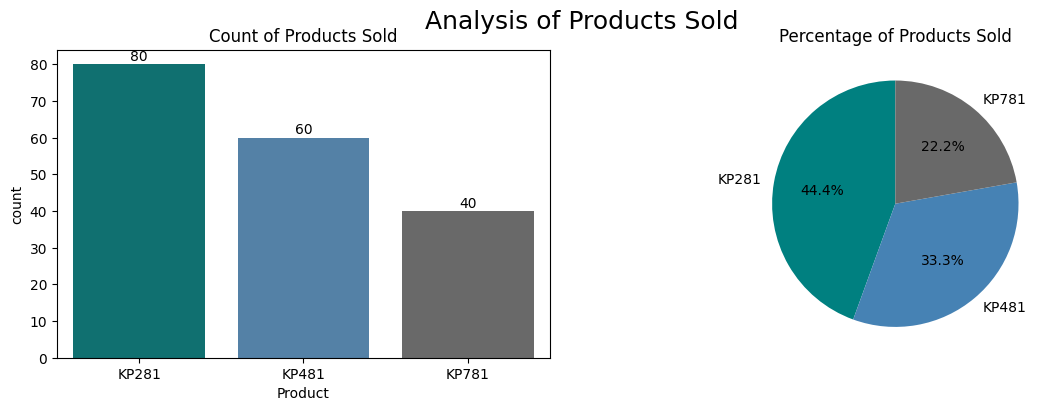

In [ ]:
plt.figure(figsize=(14,4)).suptitle('Analysis of Products Sold',fontsize=18)

plt.subplot(1,2,1)
plt.title('Count of Products Sold', fontsize=12)
g1 = sns.countplot(df, x = 'Product', palette = {'KP281':'teal', 'KP481':'steelblue', 'KP781':'dimgrey'})
for p in g1.patches:
  g1.text(p.get_x()+p.get_width()/2, p.get_height()+1, ha='center', s=round(p.get_height()))

plt.subplot(1,2,2)
plt.title('Percentage of Products Sold', fontsize=12)
g2 = plt.pie(df['Product'].value_counts(),
             labels = df['Product'].unique(),
             autopct = '%1.1f%%',
             colors = ('teal','steelblue','dimgrey'),
             startangle = 90)

plt.show()

*   The KP281 is an entry-level treadmill that sell for $1,500.

*   The KP481 is for mid-level runners that sell for $1,750.

*   The KP781 treadmill is having advanced features that sell for $2,500.




In the last quarter, product `KP281` has showcased the `strongest sales performance` compared to the other two products constituting approximately `44.4%` of the total sales.

### Products Sales

In [ ]:
sales = df.groupby('Product')['Product'].value_counts().reset_index(name='UnitsSold')
sales['UnitPrice'] = [1500,1750,2500]
sales['Sales'] = sales['UnitsSold'] * sales['UnitPrice']
sales['UnitPrice'] = sales['UnitPrice'].apply(lambda x : '$'+ str(x))
sales['Sales'] = sales['Sales'].apply(lambda x : '$'+ str(x//1000) + 'K')
sales

,Product,UnitsSold,UnitPrice,Sales
0,KP281,80,$1500,$120K
1,KP481,60,$1750,$105K
2,KP781,40,$2500,$100K


The sales revenue of the product `KP281` is `slightly larger than the other two` but all three products have nearly equal contributions in terms of generating sales revenue.

### Product type Analysis

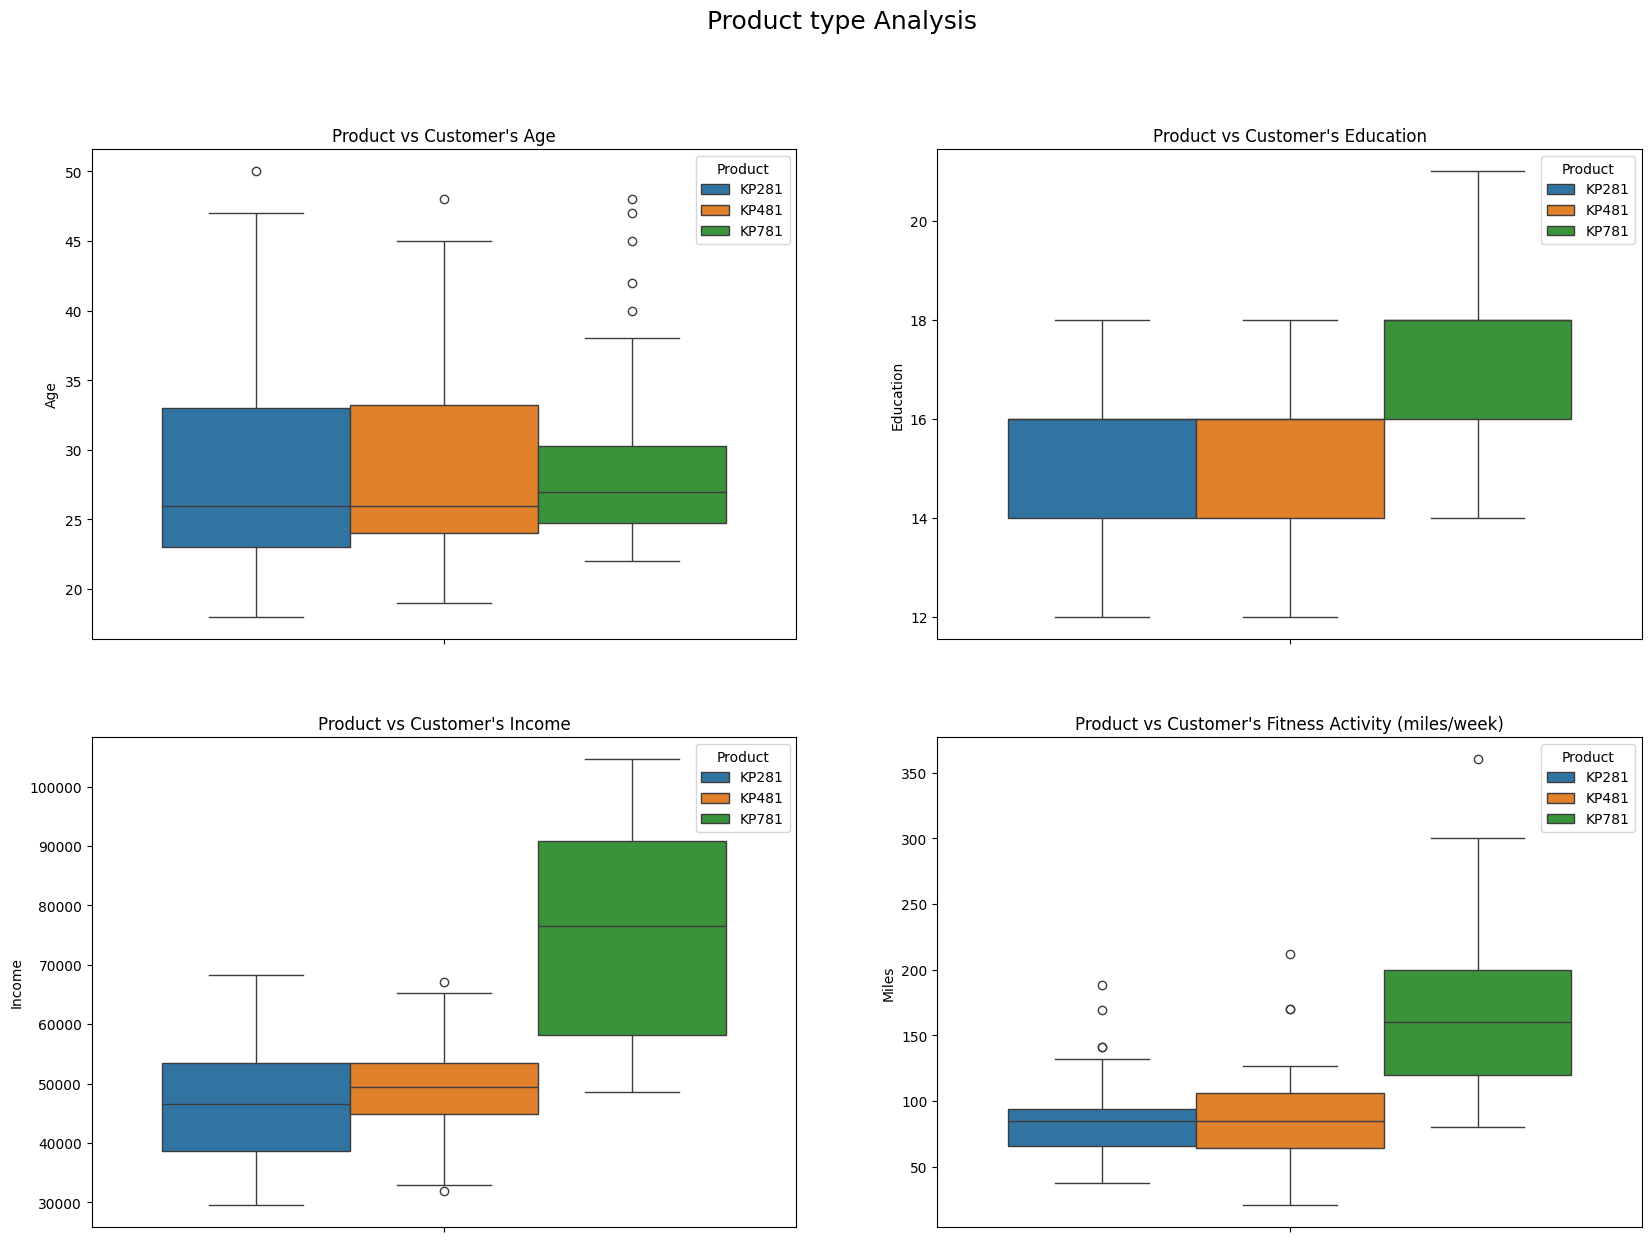

In [ ]:
plt.figure(figsize=(20,14)).suptitle('Product type Analysis',fontsize=18)

plt.subplot(2,2,1)
plt.title("Product vs Customer's Age", fontsize=12)
sns.boxplot(df, y='Age', hue='Product')

plt.subplot(2,2,2)
plt.title("Product vs Customer's Education", fontsize=12)
sns.boxplot(df, y='Education', hue='Product')

plt.subplot(2,2,3)
plt.title("Product vs Customer's Income", fontsize=12)
sns.boxplot(df, y='Income', hue='Product')

plt.subplot(2,2,4)
plt.title("Product vs Customer's Fitness Activity (miles/week)", fontsize=12)
sns.boxplot(df, y='Miles', hue='Product')

plt.show()

This shows that the product `KP781` has a strong preference among customers who possess **higher education and higher income levels, and are intended to have an active lifestyle by having average running activity greater than 150 miles/week.**

### Based on Customer's Gender and Marital Status

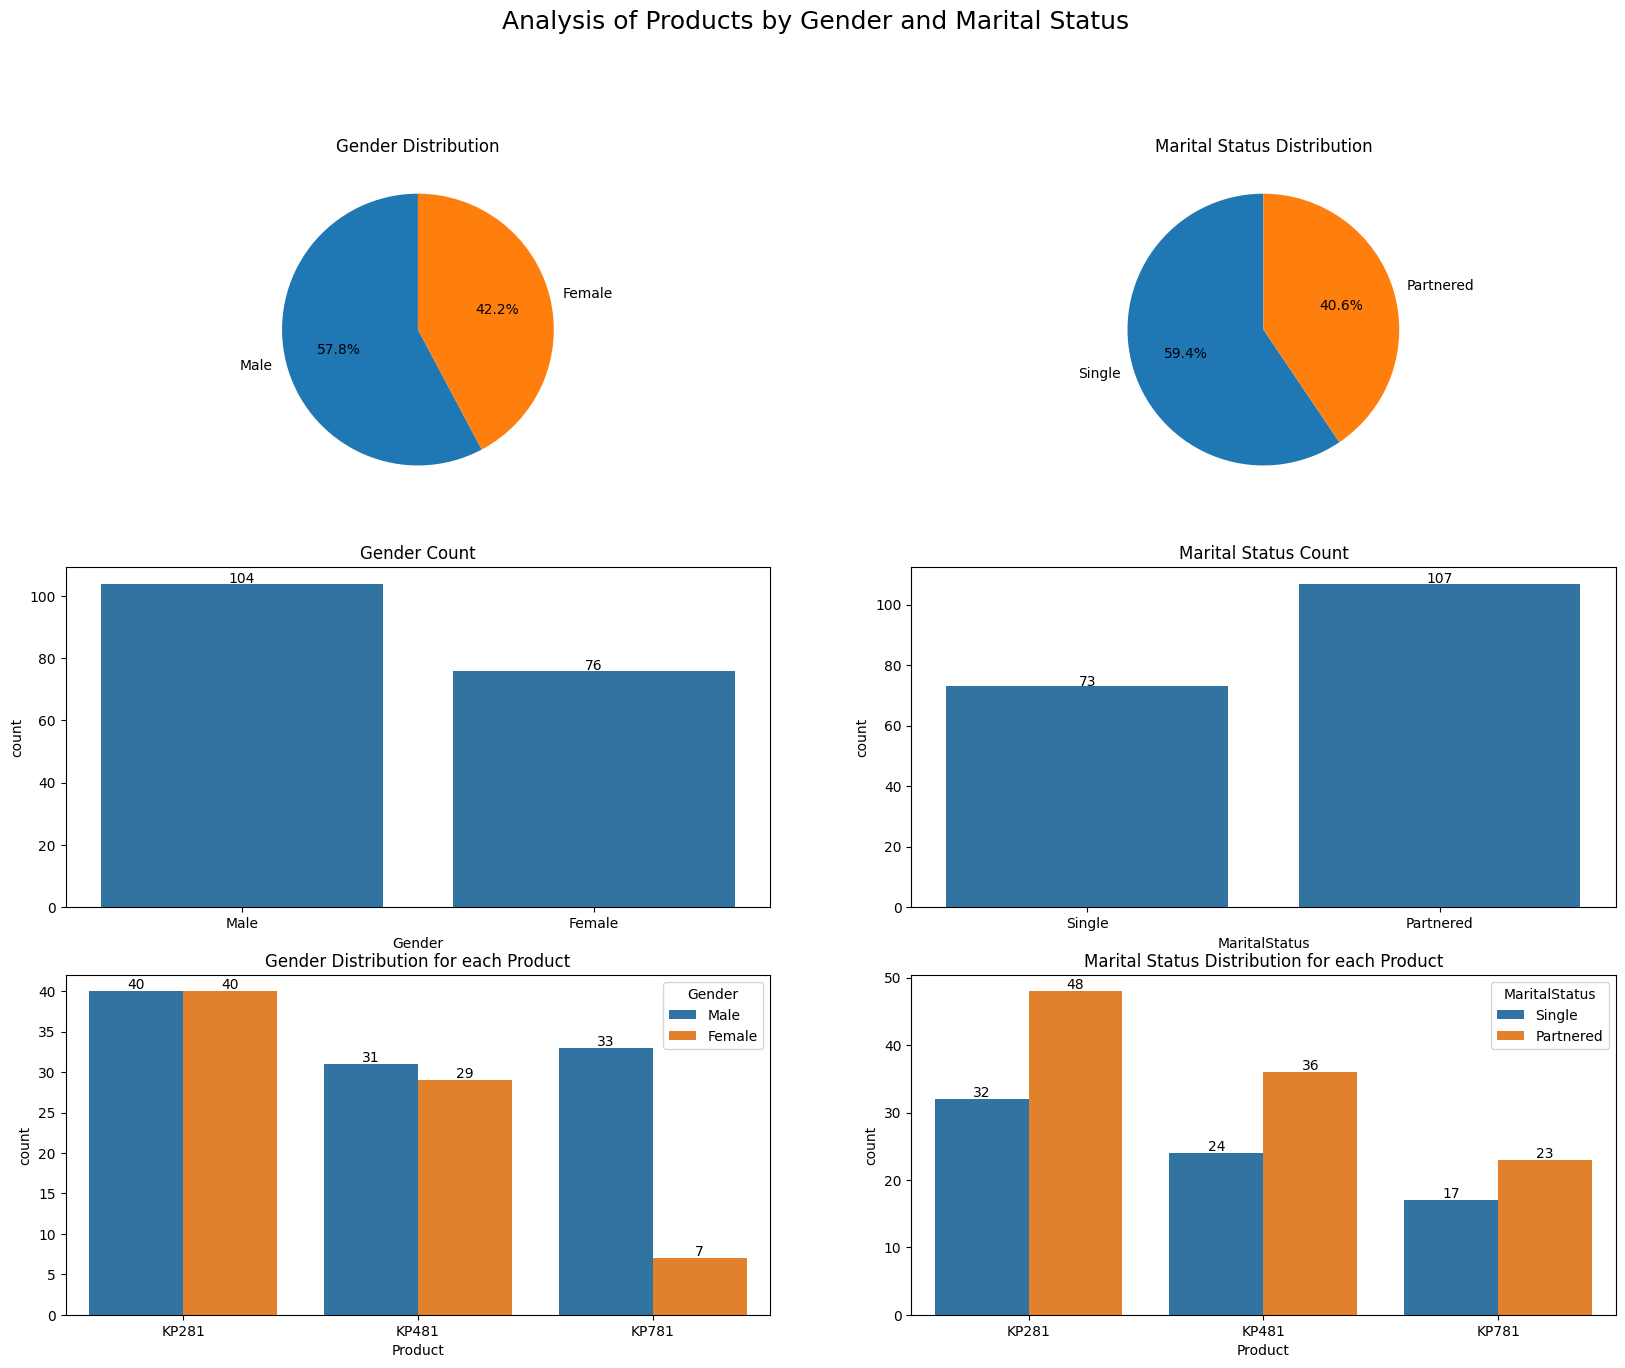

In [ ]:
plt.figure(figsize=(20,15)).suptitle('Analysis of Products by Gender and Marital Status',fontsize=18)

plt.subplot(3,2,1)
plt.title('Gender Distribution', fontsize=12)
g2 = plt.pie(df['Gender'].value_counts(),
             labels = df['Gender'].unique(),
             autopct = '%1.1f%%',
             startangle = 90)

plt.subplot(3,2,3)
plt.title('Gender Count', fontsize=12)
ax = sns.countplot(df, x = 'Gender')
for p in ax.patches:
  if p.get_height():
    ax.text(p.get_x()+p.get_width()/2, p.get_height()+0.3, ha='center', s=round(p.get_height()))

plt.subplot(3,2,5)
plt.title('Gender Distribution for each Product', fontsize=12)
ax = sns.countplot(df, x = 'Product', hue = 'Gender')
for p in ax.patches:
  if p.get_height():
    ax.text(p.get_x()+p.get_width()/2, p.get_height()+0.3, ha='center', s=round(p.get_height()))

plt.subplot(3,2,2)
plt.title('Marital Status Distribution', fontsize=12)
g2 = plt.pie(df['MaritalStatus'].value_counts(),
             labels = df['MaritalStatus'].unique(),
             autopct = '%1.1f%%',
             startangle = 90)

plt.subplot(3,2,4)
plt.title('Marital Status Count', fontsize=12)
ax = sns.countplot(df, x = 'MaritalStatus')
for p in ax.patches:
  if p.get_height():
    ax.text(p.get_x()+p.get_width()/2, p.get_height()+0.3, ha='center', s=round(p.get_height()))

plt.subplot(3,2,6)
plt.title('Marital Status Distribution for each Product', fontsize=12)
ax = sns.countplot(df, x = 'Product', hue = 'MaritalStatus')
for p in ax.patches:
  if p.get_height():
    ax.text(p.get_x()+p.get_width()/2, p.get_height()+0.3, ha='center', s=round(p.get_height()))

plt.show()

* Around `58%` of the buyers are `Male` and `42%` are `female`.

* Around `60%` of the buyers are `Married` and `40%` are `single`.

* Product `KP781` which is the high end model is mostly bought by `Males`.

#### Probability and Conditional Probability for Customer's Gender

In [ ]:
pd.crosstab(df['Product'], df['Gender'], margins=True, normalize=True).round(4)*100

Gender,Female,Male,All
Product,,,
KP281,22.22,22.22,44.44
KP481,16.11,17.22,33.33
KP781,3.89,18.33,22.22
All,42.22,57.78,100.00


- The **`Probability`** of a treadmill being purchased by a **`female is 42.2%`**.

    - **`The conditional probability`** of purchasing the treadmill model given that the customer is **`female`** is :
    
        - For Product KP281 - **22.22%**
    
        - For Product KP481 - **16.11%**
    
        - For Product KP781 - **3.89%**


- The **`Probability`** of a treadmill being purchased by a **`male is 57.78%`**.

    - **`The conditional probability`** of purchasing the treadmill model given that the customer is **`male`** is :

        - For Product KP281 - **22.22%**
    
        - For Product KP481 - **17.22%**
    
        - For Product KP781 - **18.33%**

#### Probability and Conditional Probability for Customer's Marital Status

In [ ]:
pd.crosstab(df['Product'], df['MaritalStatus'], margins=True, normalize=True).round(4)*100

MaritalStatus,Partnered,Single,All
Product,,,
KP281,26.67,17.78,44.44
KP481,20.00,13.33,33.33
KP781,12.78,9.44,22.22
All,59.44,40.56,100.00


- The **`Probability`** of a treadmill being purchased by a **`Married Customer is 59.44%`**.

    - **`The conditional probability`** of purchasing the treadmill model given that the customer is **`Married`** is :
    
        - For Product KP281 - **26.67%**
    
        - For Product KP481 - **20%**
    
        - For Product KP781 - **12.78%**


- The **`Probability`** of a treadmill being purchased by a **`Unmarried Customer is 40.56%`**.

    - **`The conditional probability`** of purchasing the treadmill model given that the customer is **`Unmarried`** is :

        - For Product KP281 - **17.78%**
    
        - For Product KP481 - **13.33%**
    
        - For Product KP781 - **9.44%**

### Based on Customer's Usage and Fitness

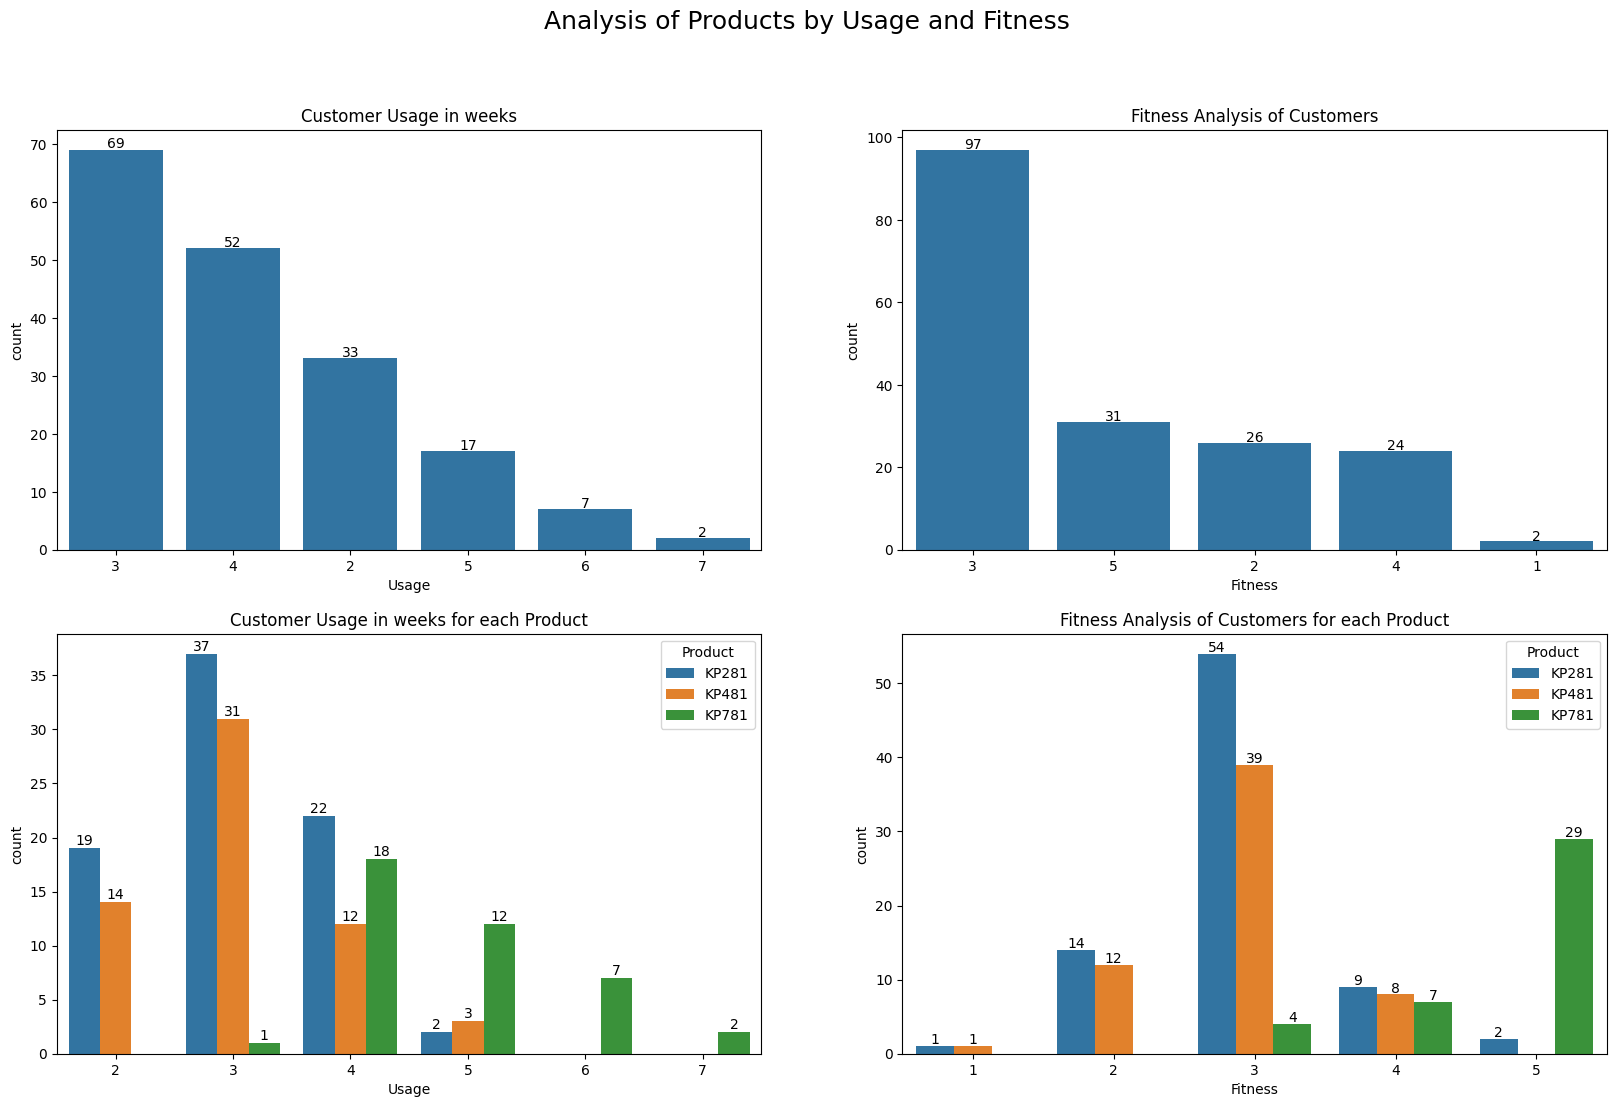

In [ ]:
plt.figure(figsize=(20,12)).suptitle('Analysis of Products by Usage and Fitness',fontsize=18)

plt.subplot(2,2,1)
plt.title('Customer Usage in weeks', fontsize=12)
g2 = sns.countplot(df, x = 'Usage',  order = df['Usage'].value_counts().index)
for p in g2.patches:
  g2.text(p.get_x()+p.get_width()/2, p.get_height()+0.3, ha='center', s=round(p.get_height()))

plt.subplot(2,2,3)
plt.title('Customer Usage in weeks for each Product', fontsize=12)
ax = sns.countplot(df, x = 'Usage', hue = 'Product')
for p in ax.patches:
  if p.get_height():
    ax.text(p.get_x()+p.get_width()/2, p.get_height()+0.3, ha='center', s=round(p.get_height()))

plt.subplot(2,2,2)
plt.title('Fitness Analysis of Customers', fontsize=12)
g2 = sns.countplot(df, x = 'Fitness', order = df['Fitness'].value_counts().index)
for p in g2.patches:
  g2.text(p.get_x()+p.get_width()/2, p.get_height()+0.3, ha='center', s=round(p.get_height()))

plt.subplot(2,2,4)
plt.title('Fitness Analysis of Customers for each Product', fontsize=12)
ax = sns.countplot(df, x = 'Fitness', hue = 'Product')
for p in ax.patches:
  if p.get_height():
    ax.text(p.get_x()+p.get_width()/2, p.get_height()+0.3, ha='center', s=round(p.get_height()))

plt.show()

- Almost `85%` of the customers plan to use the treadmill for `2 to 4 times a week` and only `15% using 5 times and above each week`.
- Almost `54%` of the customers have self-evaluated their `fitness rating at 3 on a scale of 1 to 5`. Furthermore, a substantial `84%` of the total customers have rated themselves at `3 or higher`, indicating commendable fitness levels.


#### Probability and Conditional Probability for Customer's Usage

In [ ]:
pd.crosstab(df['Product'], df['Usage'], margins=True, normalize=True).round(4)*100

Usage,2,3,4,5,6,7,All
Product,,,,,,,
KP281,10.56,20.56,12.22,1.11,0.00,0.00,44.44
KP481,7.78,17.22,6.67,1.67,0.00,0.00,33.33
KP781,0.00,0.56,10.00,6.67,3.89,1.11,22.22
All,18.33,38.33,28.89,9.44,3.89,1.11,100.00


- The **`Probability`** of a treadmill being purchased by a customer with **`Usage 3 per week is 38.33%`**.

    - **`The conditional probability`** of purchasing the treadmill model given that the customer has **`Usage 3 per week`** is :

        - For Product KP281 - **20.56%**
    
        - For Product KP481 - **17.22%**
    
        - For Product KP781 - **0.56%**
        
        
- The **`Probability`** of a treadmill being purchased by a customer with **`Usage 4 per week is 28.89%`**.

    - **`The conditional probability`** of purchasing the treadmill model given that the customer has **`Usage 4 per week`** is :

        - For Product KP281 - **12.22%**
    
        - For Product KP481 - **6.67%**
    
        - For Product model KP781 - **10%**

- The **`Probability`** of a treadmill being purchased by a customer with **`Usage 2 per week is 18.33%`**.

    - **`The conditional probability`** of purchasing the treadmill model given that the customer has **`Usage 2 per week`** is :

        - For Product KP281 - **10.56%**
    
        - For Product KP481 - **7.78%**
    
        - For Product KP781 - **0%**

#### Probability and Conditional Probability for Customer's Fitness level

In [ ]:
pd.crosstab(df['Product'], df['Fitness'], margins=True, normalize=True).round(4)*100

Fitness,1,2,3,4,5,All
Product,,,,,,
KP281,0.56,7.78,30.00,5.00,1.11,44.44
KP481,0.56,6.67,21.67,4.44,0.00,33.33
KP781,0.00,0.00,2.22,3.89,16.11,22.22
All,1.11,14.44,53.89,13.33,17.22,100.00


- The **`Probability`** of a treadmill being purchased by a customer with **`Average Fitness rating (3) is 54%`**.

    - **`The conditional probability`** of purchasing the treadmill model given that the customer has **`Average Fitness`** is :
        
        - For product KP281 - **30%**
    
        - For product KP481 - **22%**
    
        - For product KP781 - **2%**
        

- The **`Probability`** of a treadmill being purchased by a customer having **`Fitness rating 2 is almost 14%`**.

- The **`Probability`** of a treadmill being purchased by a customer having **`Fitness rating 4 is almost 13%`**.

- The **`Probability`** of a treadmill being purchased by a customer having **`Fitness rating 5 is almost 17%`**.

- The **`Probability`** of a treadmill being purchased by a customer having **`very low Fitness rating (1) is  1%`**.

### Based on Customer's Age

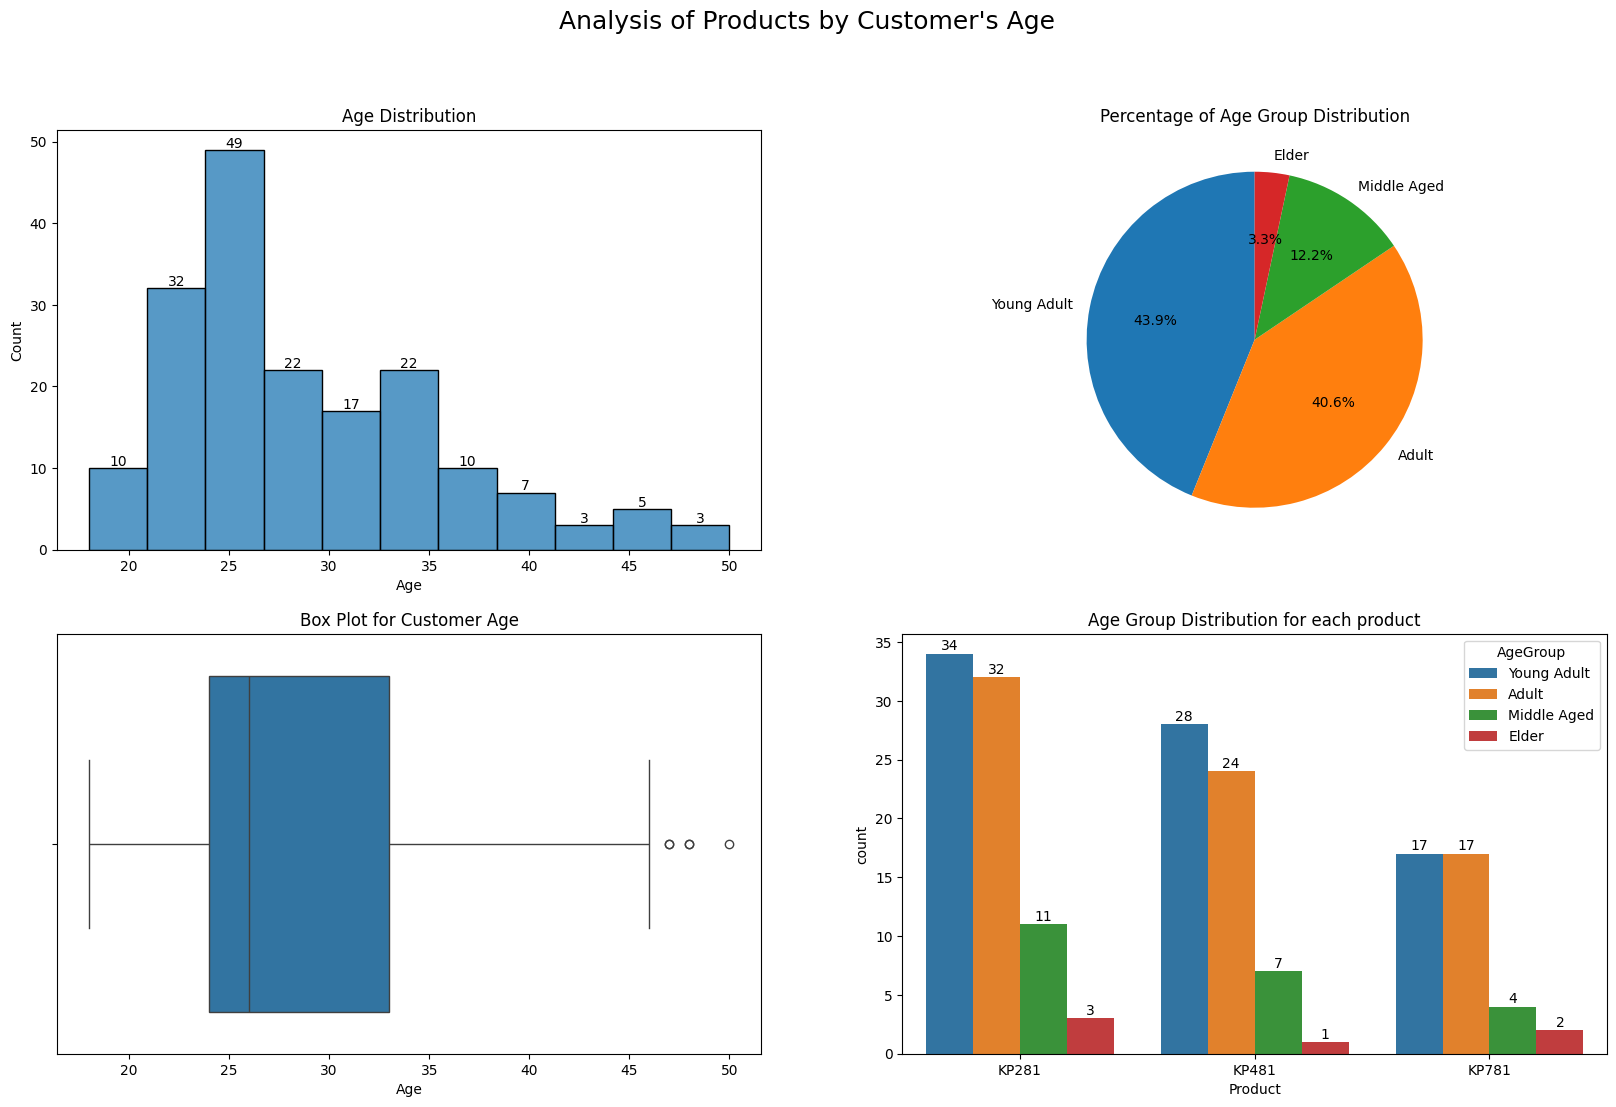

In [ ]:
plt.figure(figsize=(20,12)).suptitle("Analysis of Products by Customer's Age",fontsize=18)

plt.subplot(2,2,1)
plt.title('Age Distribution', fontsize=12)
g2 = sns.histplot(df, x = 'Age')
for p in g2.patches:
  g2.text(p.get_x()+p.get_width()/2, p.get_height()+0.3, ha='center', s=round(p.get_height()))

plt.subplot(2,2,3)
plt.title('Box Plot for Customer Age', fontsize=12)
sns.boxplot(df, x='Age')

plt.subplot(2,2,2)
plt.title('Percentage of Age Group Distribution', fontsize=12)
g2 = plt.pie(df['AgeGroup'].value_counts(),
             labels = df['AgeGroup'].value_counts().index,
             autopct = '%1.1f%%',
             startangle = 90)

plt.subplot(2,2,4)
plt.title('Age Group Distribution for each product', fontsize=12)
ax = sns.countplot(df, x = 'Product', hue='AgeGroup')
for p in ax.patches:
  if p.get_height():
    ax.text(p.get_x()+p.get_width()/2, p.get_height()+0.3, ha='center', s=round(p.get_height()))

plt.show()

In [5]:
df['Age'].describe()

count    180.000000
mean      28.788889
std        6.943498
min       18.000000
25%       24.000000
50%       26.000000
75%       33.000000
max       50.000000
Name: Age, dtype: float64

- Almost `85%` of the customers falls under the age range of `18 to 35 (Young Adults and Adults)`, with a median age of `26`, suggesting young people showing more interest in the companies products

- There are `3 outliers` present in the age data.



Young Adult: 15 - 25 yrs of age

Adults: 26 - 35 yrs of age

Middle Aged: 36 - 45 yrs of age

Elder : above 46 yrs of age

#### Probability and Conditional Probability for Customer's Age

In [ ]:
pd.crosstab(df['Product'], df['AgeGroup'], margins=True, normalize=True).round(4)*100

AgeGroup,Young Adult,Adult,Middle Aged,Elder,All
Product,,,,,
KP281,18.89,17.78,6.11,1.67,44.44
KP481,15.56,13.33,3.89,0.56,33.33
KP781,9.44,9.44,2.22,1.11,22.22
All,43.89,40.56,12.22,3.33,100.00


- The **`Probability`** of a treadmill being purchased by a **`Young Adult (18-25) is 43.89%`**.

    - **`The conditional probability`** of purchasing the treadmill model given that the customer is **`Young Adult`** is :
    
        - For product KP281 - **18.89%**
    
        - For product KP481 - **15.56%**
    
        - For product KP781 - **9.44%**


- The **`Probability`** of a treadmill being purchased by a **`Adult (26-35) is 40.56%`**.

    - **`The conditional probability`** of purchasing the treadmill model given that the customer is **`Adult`** is :

        - For product KP281 - **17.78%**
    
        - For product KP481 - **13.33%**
    
        - For product KP781 - **9.44%**
        
        
- The **`Probability`** of a treadmill being purchased by a **`Middle Aged (36-45) is 12.22%`**.
        
        
- The **`Probability`** of a treadmill being purchased by a **`Elder (Above 45) is only 3.33%`**.

### Based on Customer's Education

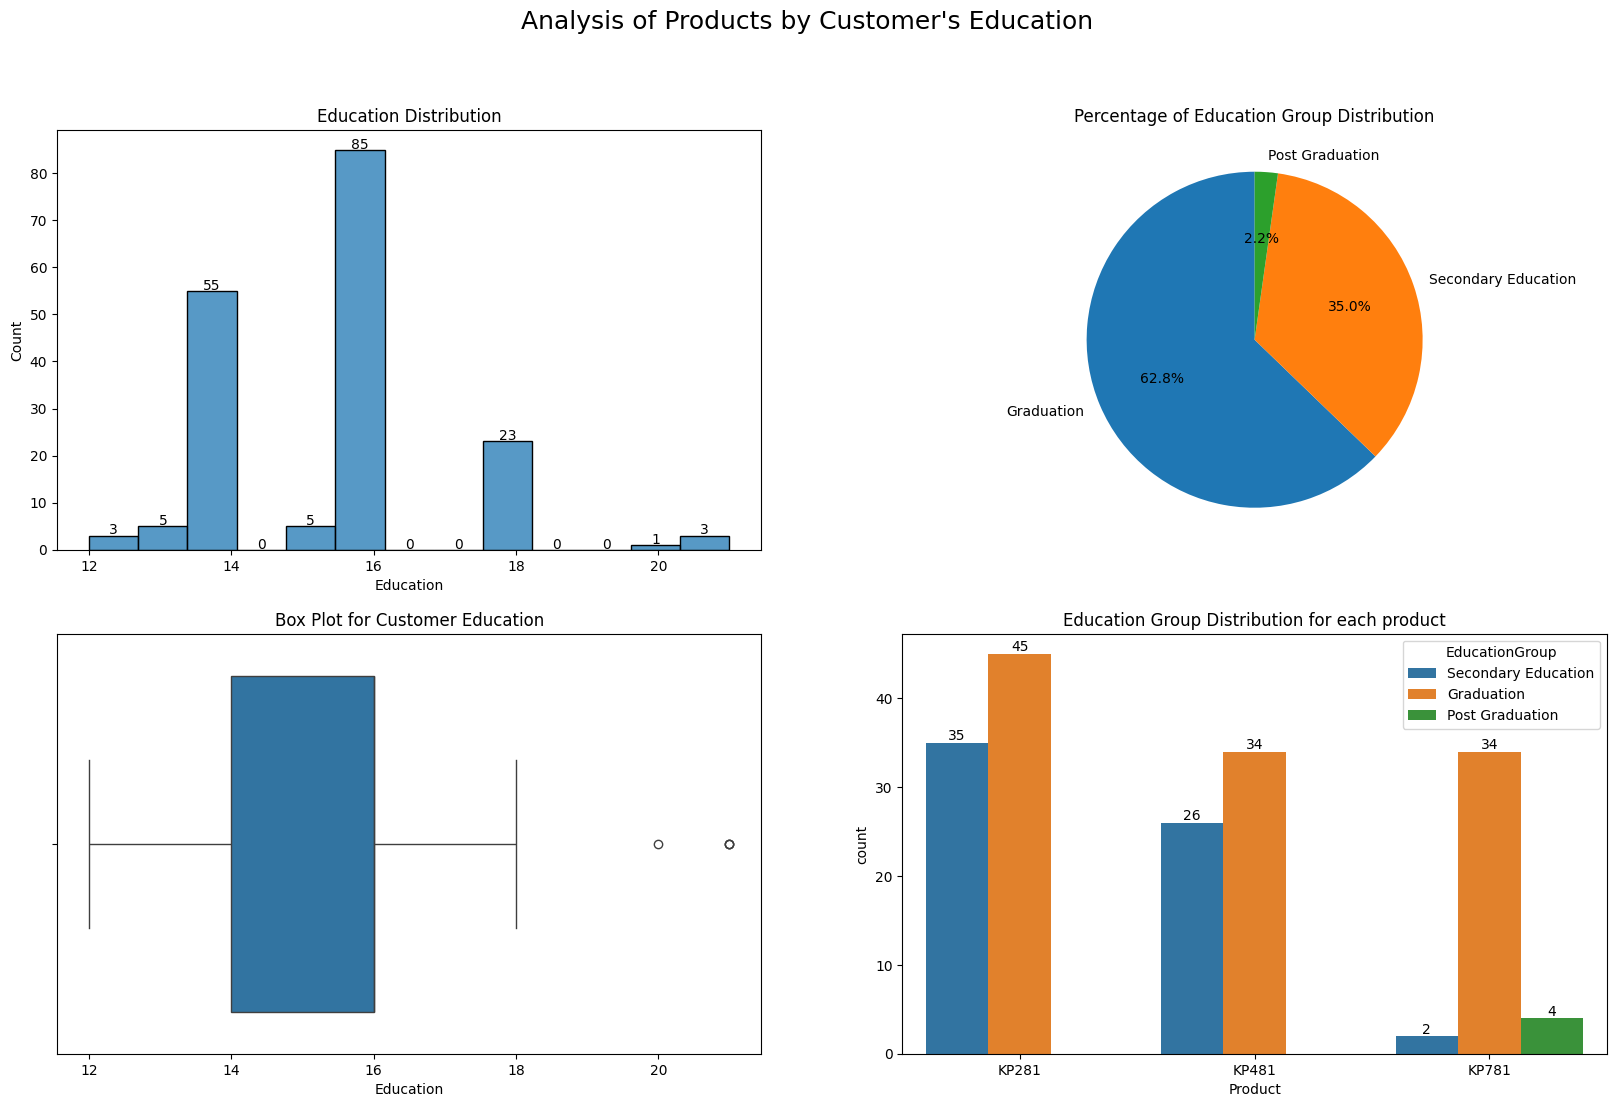

In [ ]:
plt.figure(figsize=(20,12)).suptitle("Analysis of Products by Customer's Education",fontsize=18)

plt.subplot(2,2,1)
plt.title('Education Distribution', fontsize=12)
g2 = sns.histplot(df, x = 'Education')
for p in g2.patches:
  g2.text(p.get_x()+p.get_width()/2, p.get_height()+0.3, ha='center', s=round(p.get_height()))

plt.subplot(2,2,3)
plt.title('Box Plot for Customer Education', fontsize=12)
sns.boxplot(df, x='Education')

plt.subplot(2,2,2)
plt.title('Percentage of Education Group Distribution', fontsize=12)
g2 = plt.pie(df['EducationGroup'].value_counts(),
             labels = df['EducationGroup'].value_counts().index,
             autopct = '%1.1f%%',
             startangle = 90)

plt.subplot(2,2,4)
plt.title('Education Group Distribution for each product', fontsize=12)
ax = sns.countplot(df, x = 'Product', hue='EducationGroup')
for p in ax.patches:
  if p.get_height():
    ax.text(p.get_x()+p.get_width()/2, p.get_height()+0.3, ha='center', s=round(p.get_height()))

plt.show()

In [6]:
df['Education'].describe()

count    180.000000
mean      15.572222
std        1.617055
min       12.000000
25%       14.000000
50%       16.000000
75%       16.000000
max       21.000000
Name: Education, dtype: float64

- Almost `98%` of the customers are pursuing `Secondary Education or Graduation (12 - 18 Years)`.

- The remaining `2%` of the customers, a total of `4` pursued `Post Graduation (above 19 years)` and bought product `KP781` only which is the high end model.

- There are `2 outliers` present in the education data.
- 50% percentile (median) and 75% percentile are same i.e., 16 for education data.

Secondary Education: 10 - 14 yrs of education

Graduation: 15 - 18 yrs of education

Post Graduation: above 19 yrs of education

#### Probability and Conditional Probability for Customer's Education

In [ ]:
pd.crosstab(df['Product'], df['EducationGroup'], margins=True, normalize=True).round(4)*100

EducationGroup,Secondary Education,Graduation,Post Graduation,All
Product,,,,
KP281,19.44,25.00,0.00,44.44
KP481,14.44,18.89,0.00,33.33
KP781,1.11,18.89,2.22,22.22
All,35.00,62.78,2.22,100.00


- The **`Probability`** of a treadmill being purchased by a customer pursuing **`Graduation (15 - 18 Years) is 62.78%`**.

    - **`The conditional probability`** of purchasing the treadmill model given that the customer is pursuing **`Graduation`** is :
    
        - For product KP281 - **25%**
    
        - For product KP481 - **18.89%**
    
        - For product KP781 - **18.89%**


- The **`Probability`** of a treadmill being purchased by a customer pursuing **`Secondary Education (10 - 14 Years) is 35%`**.

    - **`The conditional probability`** of purchasing the treadmill model given that the customer is pursuing **`Secondary Education`** is :

        - For product KP281 - **19.44%**
    
        - For product KP481 - **14.44%**
    
        - For product KP781 - **1.11%**

- The **`Probability`** of a treadmill being purchased by a customer pursuing **`Post Graduation (19 Years) is 2.22%`**.


### Based on Customer's Income

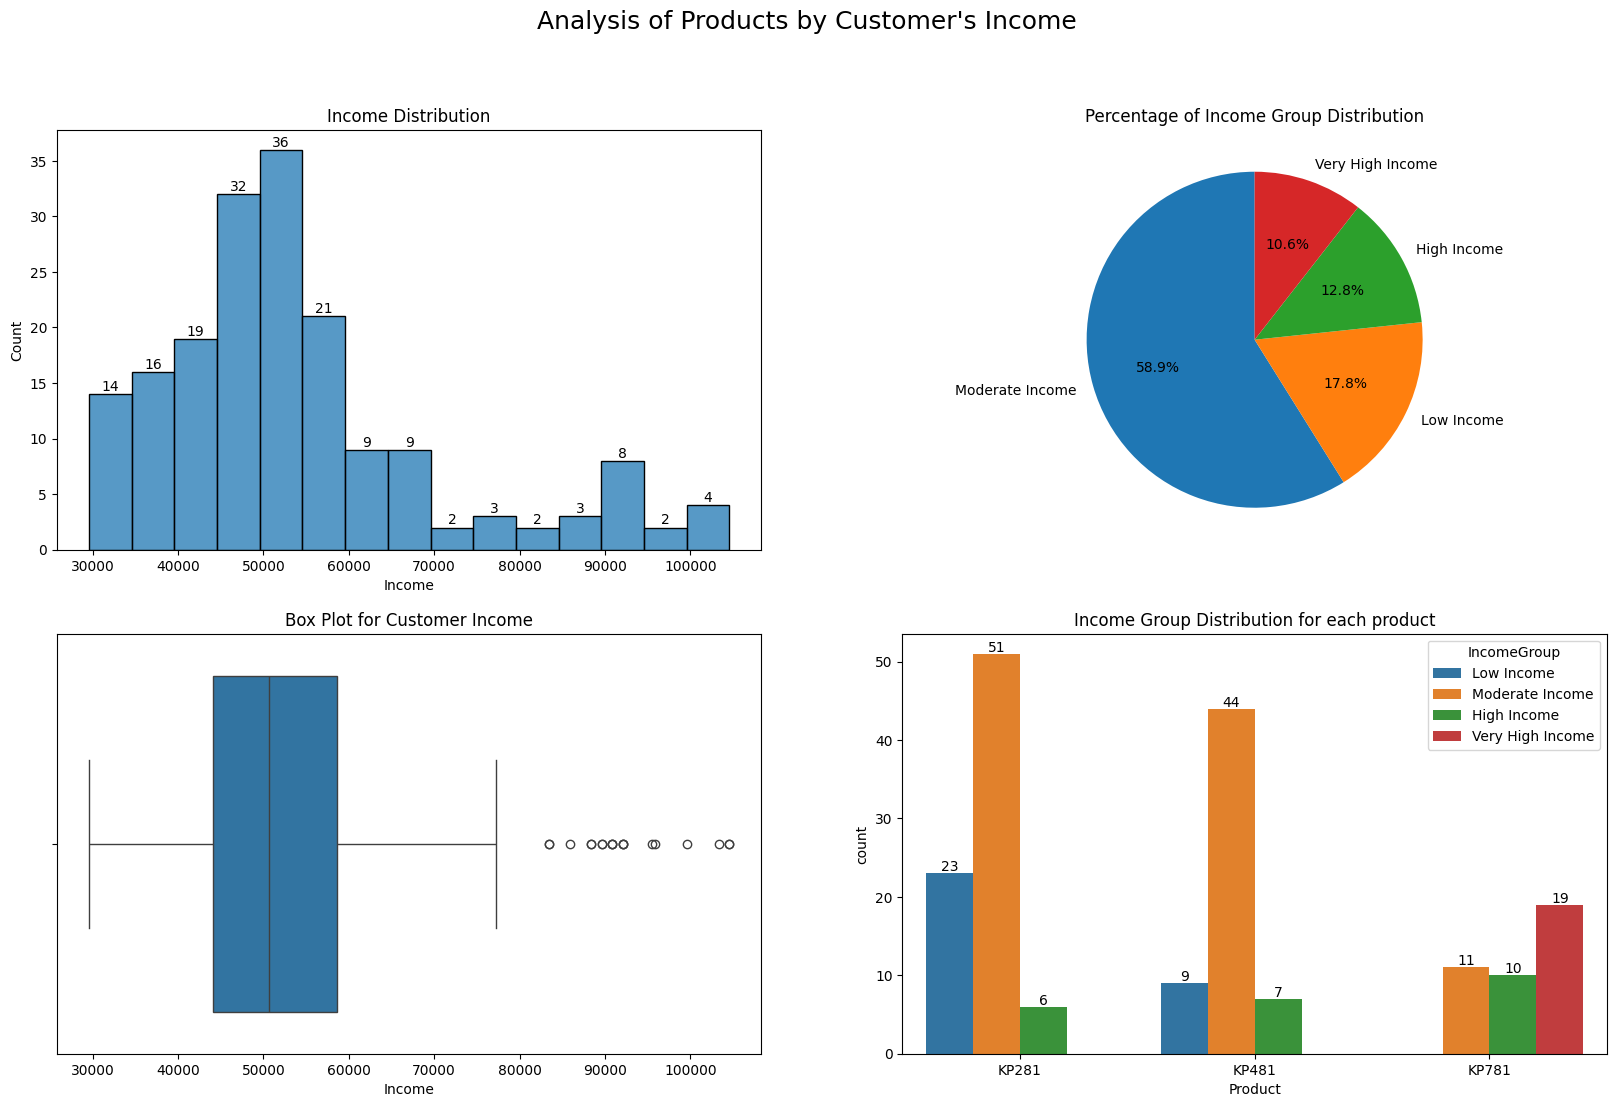

In [13]:
plt.figure(figsize=(20,12)).suptitle("Analysis of Products by Customer's Income",fontsize=18)

plt.subplot(2,2,1)
plt.title('Income Distribution', fontsize=12)
g2 = sns.histplot(df, x = 'Income')
for p in g2.patches:
  g2.text(p.get_x()+p.get_width()/2, p.get_height()+0.3, ha='center', s=round(p.get_height()))

plt.subplot(2,2,3)
plt.title('Box Plot for Customer Income', fontsize=12)
sns.boxplot(df, x='Income')

plt.subplot(2,2,2)
plt.title('Percentage of Income Group Distribution', fontsize=12)
g2 = plt.pie(df['IncomeGroup'].value_counts(),
             labels = df['IncomeGroup'].value_counts().index,
             autopct = '%1.1f%%',
             startangle = 90)

plt.subplot(2,2,4)
plt.title('Income Group Distribution for each product', fontsize=12)
ax = sns.countplot(df, x = 'Product', hue='IncomeGroup')
for p in ax.patches:
  if p.get_height():
    ax.text(p.get_x()+p.get_width()/2, p.get_height()+0.3, ha='center', s=round(p.get_height()))

plt.show()

In [7]:
df['Income'].describe()

count       180.000000
mean      53719.577778
std       16506.684226
min       29562.000000
25%       44058.750000
50%       50596.500000
75%       58668.000000
max      104581.000000
Name: Income, dtype: float64

- Almost `18%` of the customers falls under `Low income (below 40K USD)` category.

- Almost `59%` of the customers falls under `Moderate income (40K to 60K USD)` category

- Almost `77%` of the total customers fall in income group of `below 60K` and only `23%` of them falling in `60K and above` income group

- There are `many outliers` present in the income data.

Low Income - Upto 40,000

Moderate Income - 40,000 to 60,000

High Income - 60,000 to 80,000

Very High Income - Above 80,000

#### Probability and Conditional Probability for Customer's Income

In [ ]:
pd.crosstab(df['Product'], df['IncomeGroup'], margins=True, normalize=True).round(4)*100

IncomeGroup,Low Income,Moderate Income,High Income,Very High Income,All
Product,,,,,
KP281,12.78,28.33,3.33,0.00,44.44
KP481,5.00,24.44,3.89,0.00,33.33
KP781,0.00,6.11,5.56,10.56,22.22
All,17.78,58.89,12.78,10.56,100.00


- The **`Probability`** of a treadmill being purchased by a customer with **`Low Income (below 40k) is 17.78%`**.

    - **`The conditional probability`** of purchasing the treadmill model given that the customer has **`Low Income`** is :
        - For Treadmill model KP281 - **12.78%**
    
        - For Treadmill model KP481 - **5%**
    
        - For Treadmill model KP781 - **0%**
        
        
- The **`Probability`** of a treadmill being purchased by a customer with **`Moderate Income (40k - 60k) is 58.89%`**.

    - **`The conditional probability`** of purchasing the treadmill model given that the customer has **`Moderate Income`** is :
        - For Treadmill model KP281 - **28.33%**
    
        - For Treadmill model KP481 - **24.44%**
    
        - For Treadmill model KP781 - **6.11%**
        

- The **`Probability`** of a treadmill being purchased by a customer with **`High Income (60k - 80k) is 12.78%`**

    - **`The conditional probability`** of purchasing the treadmill model given that the customer has **`High Income`** is :
    
        - For Treadmill model KP281 - **3.33%**
    
        - For Treadmill model KP481 - **3.89%**
    
        - For Treadmill model KP781 - **5.56%**
        
        
- The **`Probability`** of a treadmill being purchased by a customer with **`Very High Income(above 80k) is 10.56%`** and only bought product **`KP781`**

### Based on Customer's Fitness Activity (Miles per week)

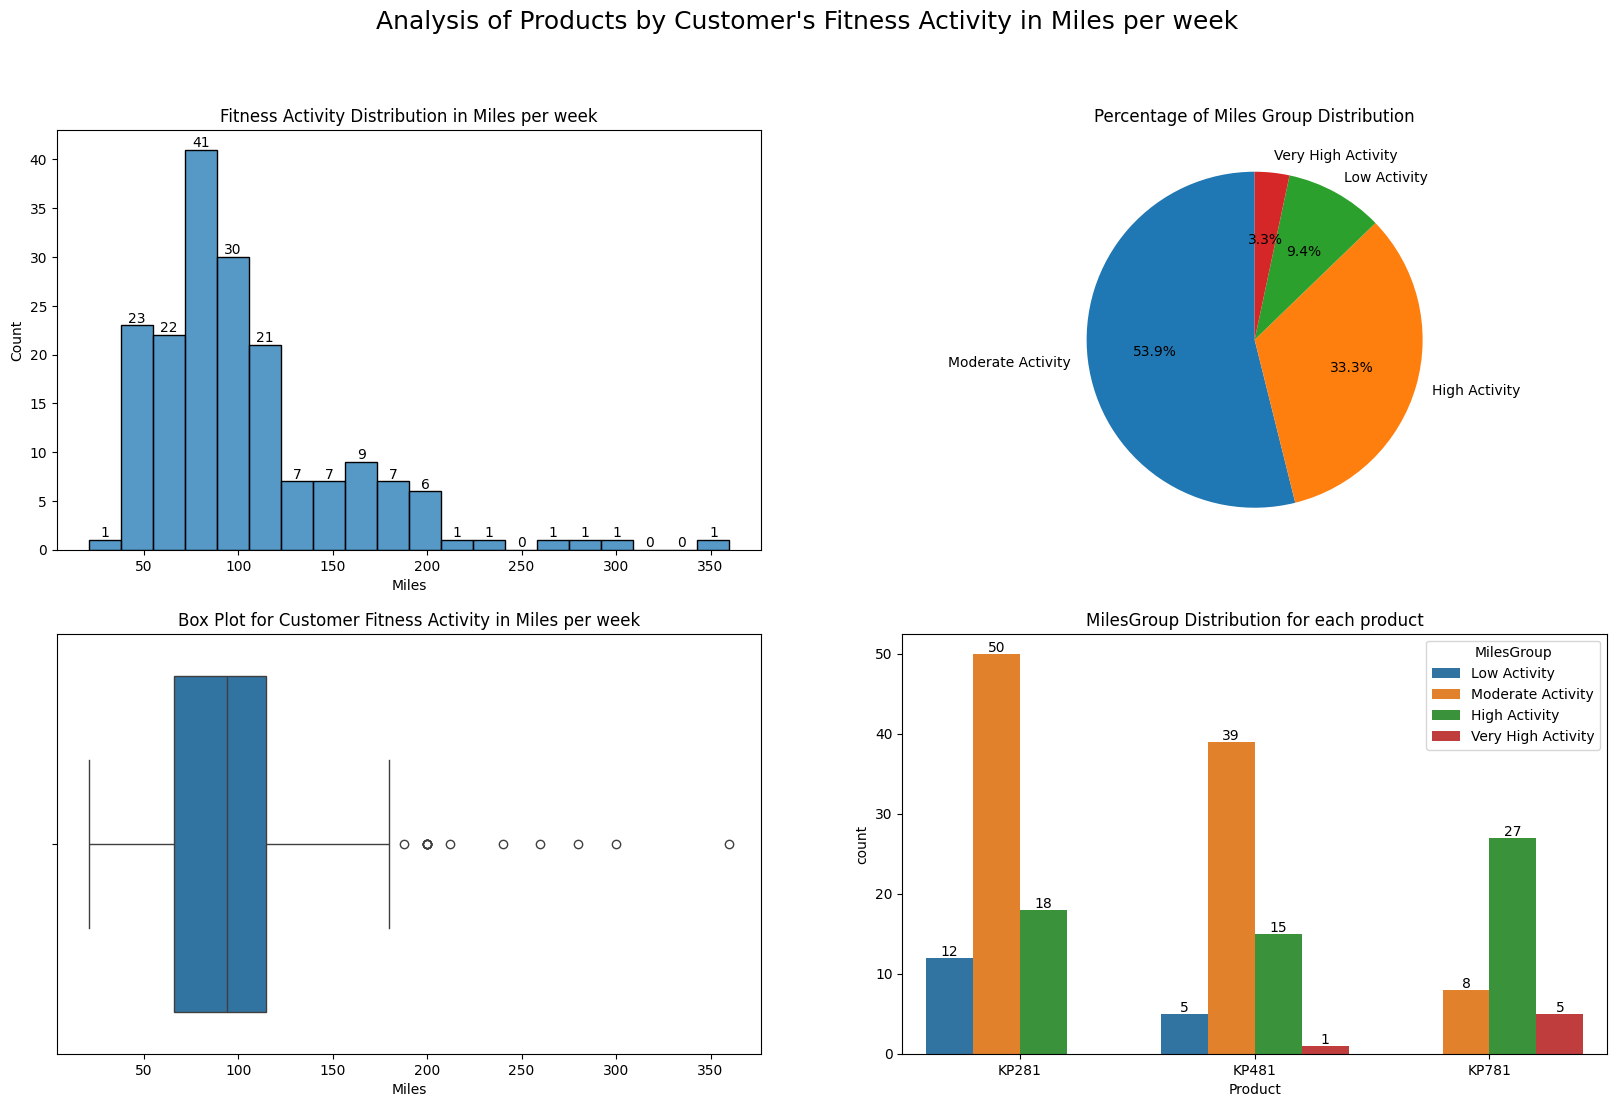

In [ ]:
plt.figure(figsize=(20,12)).suptitle("Analysis of Products by Customer's Fitness Activity in Miles per week",fontsize=18)

plt.subplot(2,2,1)
plt.title('Fitness Activity Distribution in Miles per week', fontsize=12)
g2 = sns.histplot(df, x = 'Miles')
for p in g2.patches:
  g2.text(p.get_x()+p.get_width()/2, p.get_height()+0.3, ha='center', s=round(p.get_height()))

plt.subplot(2,2,3)
plt.title('Box Plot for Customer Fitness Activity in Miles per week', fontsize=12)
sns.boxplot(df, x='Miles')

plt.subplot(2,2,2)
plt.title('Percentage of Miles Group Distribution', fontsize=12)
g2 = plt.pie(df['MilesGroup'].value_counts(),
             labels = df['MilesGroup'].value_counts().index,
             autopct = '%1.1f%%',
             startangle = 90)

plt.subplot(2,2,4)
plt.title('MilesGroup Distribution for each product', fontsize=12)
ax = sns.countplot(df, x = 'Product', hue='MilesGroup')
for p in ax.patches:
  if p.get_height():
    ax.text(p.get_x()+p.get_width()/2, p.get_height()+0.3, ha='center', s=round(p.get_height()))

plt.show()

In [8]:
df['Miles'].describe()

count    180.000000
mean     103.194444
std       51.863605
min       21.000000
25%       66.000000
50%       94.000000
75%      114.750000
max      360.000000
Name: Miles, dtype: float64

- Almost `87%` of the customers plans to use the treadmill for `50 to 200 miles` per week with a median of `94 miles per week`.

- There are `9 outliers` present in the Miles data.

Low Activity - Upto 50 miles

Moderate Activity - 51 to 100 miles

High Activity - 101 to 200 miles

Very High Activity - Above 200 miles

#### Probability and Conditional Probability for Customer's Fitness Activity

In [ ]:
pd.crosstab(df['Product'], df['MilesGroup'], margins=True, normalize=True).round(4)*100

MilesGroup,Low Activity,Moderate Activity,High Activity,Very High Activity,All
Product,,,,,
KP281,6.67,27.78,10.00,0.00,44.44
KP481,2.78,21.67,8.33,0.56,33.33
KP781,0.00,4.44,15.00,2.78,22.22
All,9.44,53.89,33.33,3.33,100.00


- The **`Probability`** of a treadmill being purchased by a customer with lifestyle of **`Light Activity (0 to 50 miles/week) is 9.44%`**.

    - **`The conditional probability`** of purchasing the treadmill model given that the customer has **`Low Activity`** is :
        
        - For Treadmill model KP281 - **6.67%**
    
        - For Treadmill model KP481 - **2.78%**
    
        - For Treadmill model KP781 - **0%**
        
        
- The **`Probability`** of a treadmill being purchased by a customer with lifestyle of **`Moderate Activity (51 to 100 miles/week) is 53.89%`**.

    - **`The conditional probability`** of purchasing the treadmill model given that the customer with lifestyle of **`Moderate Activity`** is :

        - For Treadmill model KP281 - **27.78%**
    
        - For Treadmill model KP481 - **21.67%**
    
        - For Treadmill model KP781 - **4.44%**
        

- The **`Probability`** of a treadmill being purchased by a customer has lifestyle of **`High Activity (100 to 200 miles/week) is 33.33%`**.

    - **`The conditional probability`** of purchasing the treadmill model given that the customer has **`Active Lifestyle`** is :

        - For Treadmill model KP281 - **10%**
    
        - For Treadmill model KP481 - **8.33%**
    
        - For Treadmill model KP781 - **15%**
        
        
4. The **`Probability`** of a treadmill being purchased by a customer who is a **`Fitness Enthusiast`** i.e., having **`Very high Activity (above 200 miles/week) is 3.33% only`**

## Gender wise Analysis

### Gender vs Usage

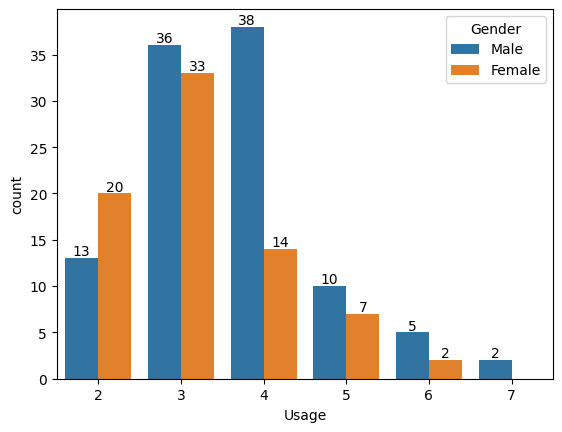

In [ ]:
ax = sns.countplot(df, x = 'Usage', hue = 'Gender')
for p in ax.patches:
  if p.get_height():
    ax.text(p.get_x()+p.get_width()/2, p.get_height()+0.3, ha='center', s=round(p.get_height()))
plt.show()

In [ ]:
pd.crosstab(df['Gender'],df['Usage'], normalize=True, margins=True).round(4)*100

Usage,2,3,4,5,6,7,All
Gender,,,,,,,
Female,11.11,18.33,7.78,3.89,1.11,0.00,42.22
Male,7.22,20.00,21.11,5.56,2.78,1.11,57.78
All,18.33,38.33,28.89,9.44,3.89,1.11,100.00


- Almost `70% of Female customers` plan to use the treadmill for `2 to 3 times a week` whereas almost `70% of Male customer` plan to use the treadmill for `3 to 4 times a week`

- Only `2 Male customers` are using treadmill for `7 times a week`.

### Gender vs Fitness

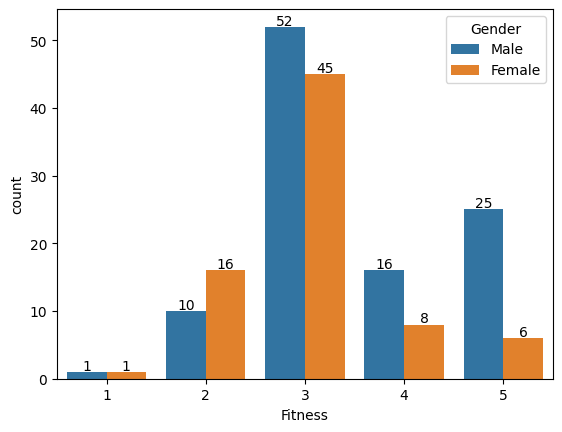

In [ ]:
ax = sns.countplot(df, x = 'Fitness', hue = 'Gender')
for p in ax.patches:
  if p.get_height():
    ax.text(p.get_x()+p.get_width()/2, p.get_height()+0.3, ha='center', s=round(p.get_height()))
plt.show()

In [ ]:
pd.crosstab(df['Fitness'],df['Usage'], normalize=True, margins=True).round(4)*100

Usage,2,3,4,5,6,7,All
Fitness,,,,,,,
1,0.56,0.56,0.00,0.00,0.00,0.00,1.11
2,7.78,5.56,1.11,0.00,0.00,0.00,14.44
3,10.00,26.11,16.67,1.11,0.00,0.00,53.89
4,0.00,5.56,3.89,3.33,0.56,0.00,13.33
5,0.00,0.56,7.22,5.00,3.33,1.11,17.22
All,18.33,38.33,28.89,9.44,3.89,1.11,100.00


- Almost `80% of Female customers` rated themselves between `2 to 3` whereas almost `90% of Male customer` rated themselves between `3 to 5` on the fitness scale

- Rating `3` is mostly rated by customers with a count of `52 for Males` and `45 for Females`.

## Correlation

### Pair Plot

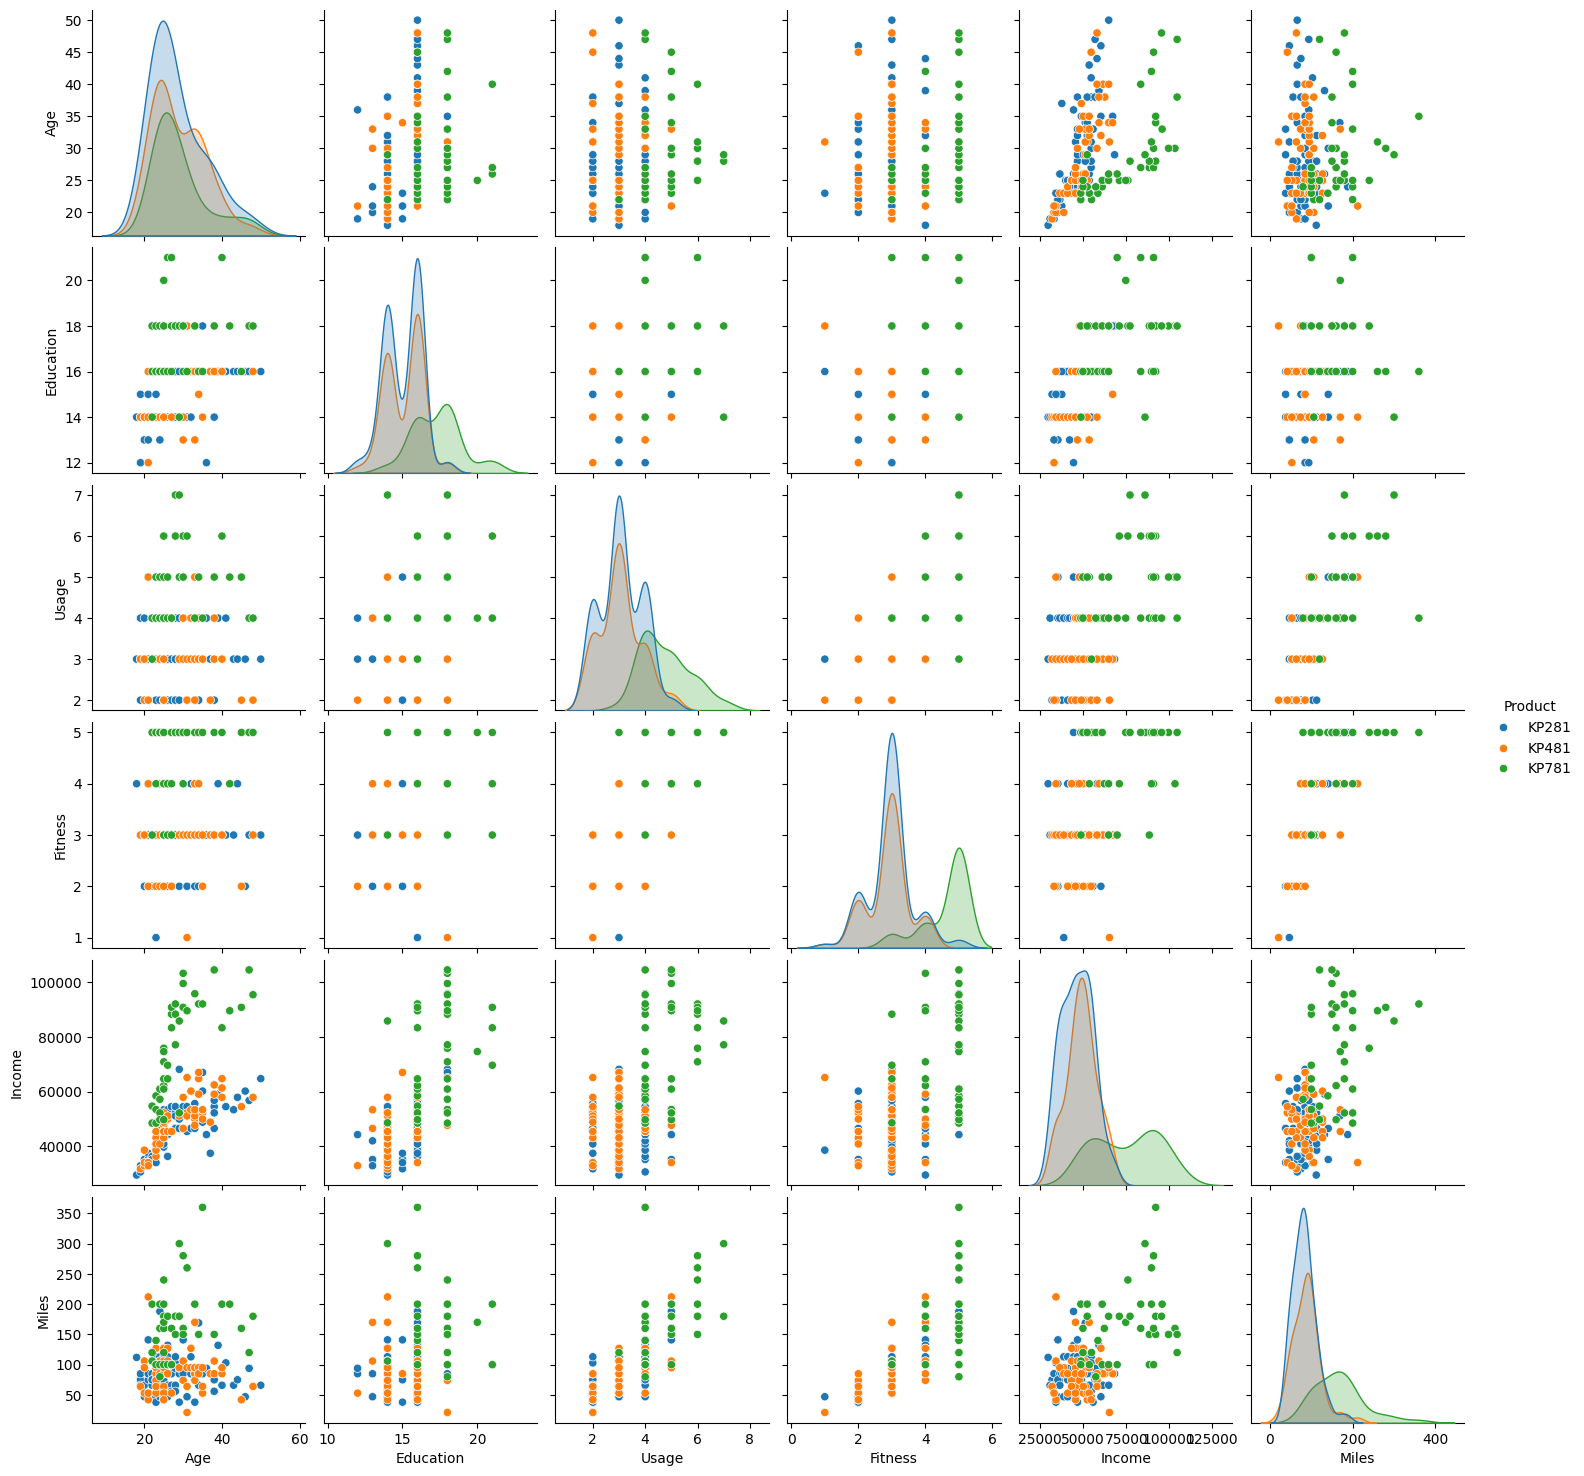

In [ ]:
sns.pairplot(df, hue ='Product')
plt.show()

- By observing the Pair plot, we can say that Products `KP281 and KP481 mostly lies under the same area` whereas Product `KP781 has area shifted towards higher values`.

### Heat Map

In [ ]:
corr_mat = df.corr(numeric_only=True)
corr_mat

,Age,Education,Usage,Fitness,Income,Miles
Age,1.000000,0.280496,0.015064,0.061105,0.513414,0.036618
Education,0.280496,1.000000,0.395155,0.410581,0.625827,0.307284
Usage,0.015064,0.395155,1.000000,0.668606,0.519537,0.759130
Fitness,0.061105,0.410581,0.668606,1.000000,0.535005,0.785702
Income,0.513414,0.625827,0.519537,0.535005,1.000000,0.543473
Miles,0.036618,0.307284,0.759130,0.785702,0.543473,1.000000


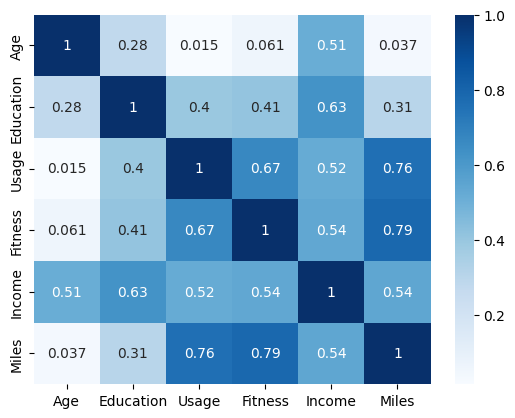

In [ ]:
sns.heatmap(corr_mat, annot = True, cmap='Blues')
plt.show()

- `Eductaion` and `Income` are highly correlated as its obvious. Eductation also has significatnt correlation between `Fitness rating and Usage of the treadmill.`
- `Usage` is highly correlated with `Fitness and Miles` as more the usage more the fitness and mileage.

# Insights

Based on above analysis

- Probability of purchase of KP281 = 44.4%
- Probability of purchase of KP481 = 33.3%
- Probability of purchase of KP781 = 22.2%


- `Customer Profile` for Product **`KP281`**:

    - Age of customer mainly between 18 and 35 years with few between 35 and 50 years
    - Education level between 13 and 18 years
    - Annual Income of customer mostly below USD 60,000
    - Weekly Usage - 2 to 4 times
    - Fitness Scale - 2 to 4
    - Weekly Running Mileage - upto 200 miles
    
    
- `Customer Profile` for Product **`KP481`**:

    - Age of customer mainly between 18 to 35 years with few between 35 to 50 years
    - Education level between 13 and 18 years
    - Annual Income of customer mostly between USD 40,000 and USD 80,000
    - Weekly Usage - 2 to 5 times
    - Fitness Scale - 2 to 4
    - Weekly Running Mileage - upto 200 miles


- `Customer Profile` for Product **`KP781`**:

    - Gender - Male
    - Age of customer mainly between 18 and 35 years with very few between 35 and 50 years
    - Education level mainly between 13 and 18 years and few above 19 years
    - Annual Income of customer mostly between USD 40,000 and USD 80,000 and some above USD 90,000
    - Weekly Usage - 4 to 7 times
    - Fitness Scale - 3 to 5
    - Weekly Running Mileage - 80 miles and above

# Recommendations

## Product KP281:

- **Target Audience:** This treadmill caters to Budget-conscious, young exercisers (aged 18-35) with moderate education level (13-18 years) and an annual income below USD 60,000. Their fitness goals may involve casual exercise, with a usage frequency of 2-4 times per week, fitness level of 2-4 out of 5 and weekly running mileage under 200 miles.

- **Recommendation:** Utilize social media platforms to promote the KP281 as an affordable entry point for fitness enthusiasts. Highlight its user-friendly features and emphasize its value for casual runners or walkers.


## Product KP481:

- **Target Audience:** This treadmill is ideal for value-conscious runners within 18-50 age range with moderate education level (13-18 years) and an annual income between USD 40,000 and USD 60,000. They may consider themselves occasional runners, using the treadmill 2-5 times per week, fitness level of 2-4 out of 5 and weekly running mileage under 200 miles.

- **Recommendation:** Leverage online advertising channels to reach this value-conscious demographic. Focus on the KP481's features that cater to occasional runners and highlight its durability for regular workouts.

## Product KP781:

- **Target Audience:** This advanced treadmill targets Serious male runners within 18-35 age range pursued graduation or post graduation, most having (13-18 years) and a few having (above 19 years) of education level and their annual income likely fall within the USD 40,000 - USD 80,000 income bracket, with some exceeding USD 90,000. They are dedicated runners,using the treadmill 4-7 times per week, fitness level of 3-5 out of 5 and weekly running mileage is over 80 miles or more (mostly above 150).

- **Recommendation:** Advertise the KP781 in running magazines, websites, and events. Emphasize its advanced features, durability for high mileage, and ability to support dedicated training programs.

## General Recommendations:

- **Customer Engagement:** Implement targeted email campaigns and personalized offers based on customer profiles.

- **Social Media:** Utilize social media platforms to engage with potential customers and share product benefits.

- **Customer Feedback:** Collect feedback through surveys or social media polls to understand customer preferences and improve product offerings.

- **Competitive Analysis:** Continuously monitor competitor products and pricing strategies to stay competitive in the market.

- **Customer Service:** Provide excellent customer service and post-purchase support to enhance brand loyalty and encourage repeat purchases.